In [1]:
!pip install requests pandas matplotlib seaborn

In [2]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def get_pokemon_data(pokemon_id):

    url = f"https://pokeapi.co/api/v2/pokemon/{pokemon_id}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        return None

def transform_pokemon_data(pokemon_json):

    if pokemon_json:
        return {
            "name": pokemon_json['name'],
            "hp": pokemon_json['stats'][0]['base_stat'],
            "attack": pokemon_json['stats'][1]['base_stat'],
            "defense": pokemon_json['stats'][2]['base_stat'],
            "special_attack": pokemon_json['stats'][3]['base_stat'],
            "special_defense": pokemon_json['stats'][4]['base_stat'],
            "speed": pokemon_json['stats'][5]['base_stat'],
            "types": [type_info['type']['name'] for type_info in pokemon_json['types']],
            "abilities": [ability_info['ability']['name'] for ability_info in pokemon_json['abilities']],
            "weight": pokemon_json['weight'],
            "height": pokemon_json['height'],
        }
    else:
        return {}


In [4]:

pokemon_data = [get_pokemon_data(i) for i in range(1, 151)]
transformed_data = [transform_pokemon_data(p) for p in pokemon_data]


df = pd.DataFrame(transformed_data)


df.head()


,name,hp,attack,defense,special_attack,special_defense,speed,types,abilities,weight,height
0,bulbasaur,45,49,49,65,65,45,"[grass, poison]","[overgrow, chlorophyll]",69,7
1,ivysaur,60,62,63,80,80,60,"[grass, poison]","[overgrow, chlorophyll]",130,10
2,venusaur,80,82,83,100,100,80,"[grass, poison]","[overgrow, chlorophyll]",1000,20
3,charmander,39,52,43,60,50,65,[fire],"[blaze, solar-power]",85,6
4,charmeleon,58,64,58,80,65,80,[fire],"[blaze, solar-power]",190,11


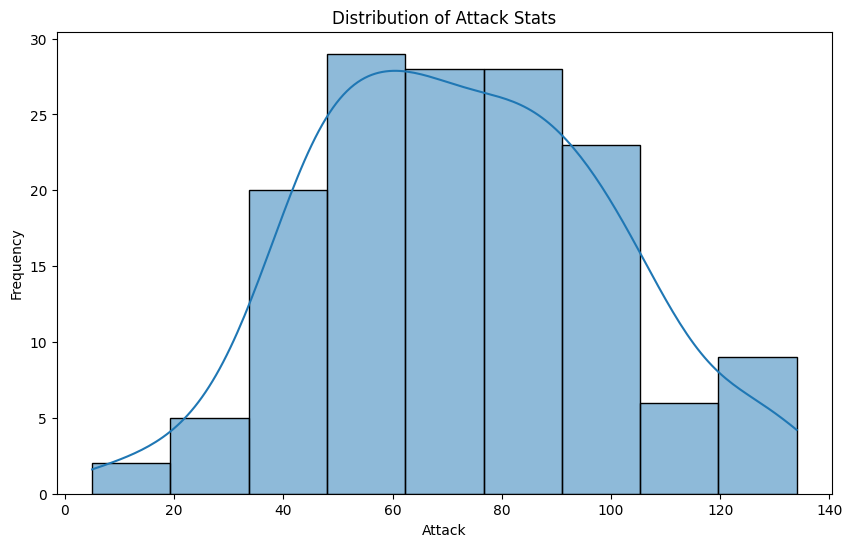

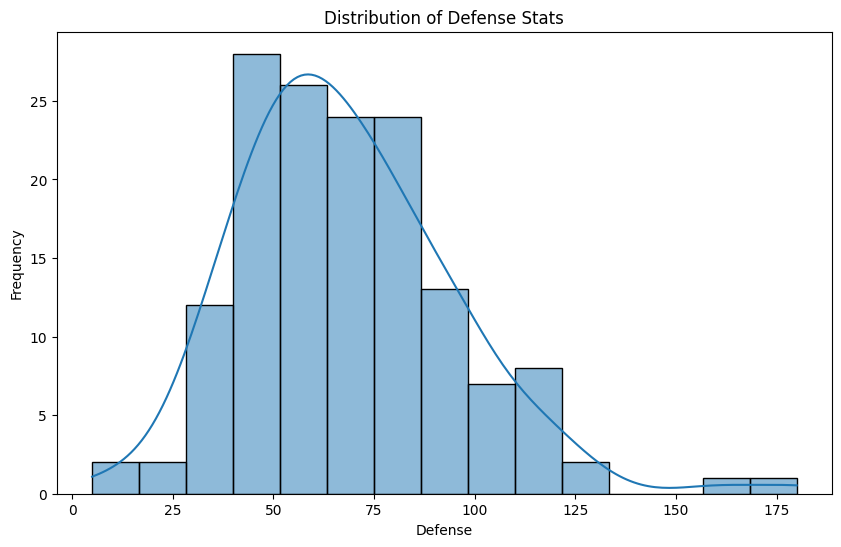

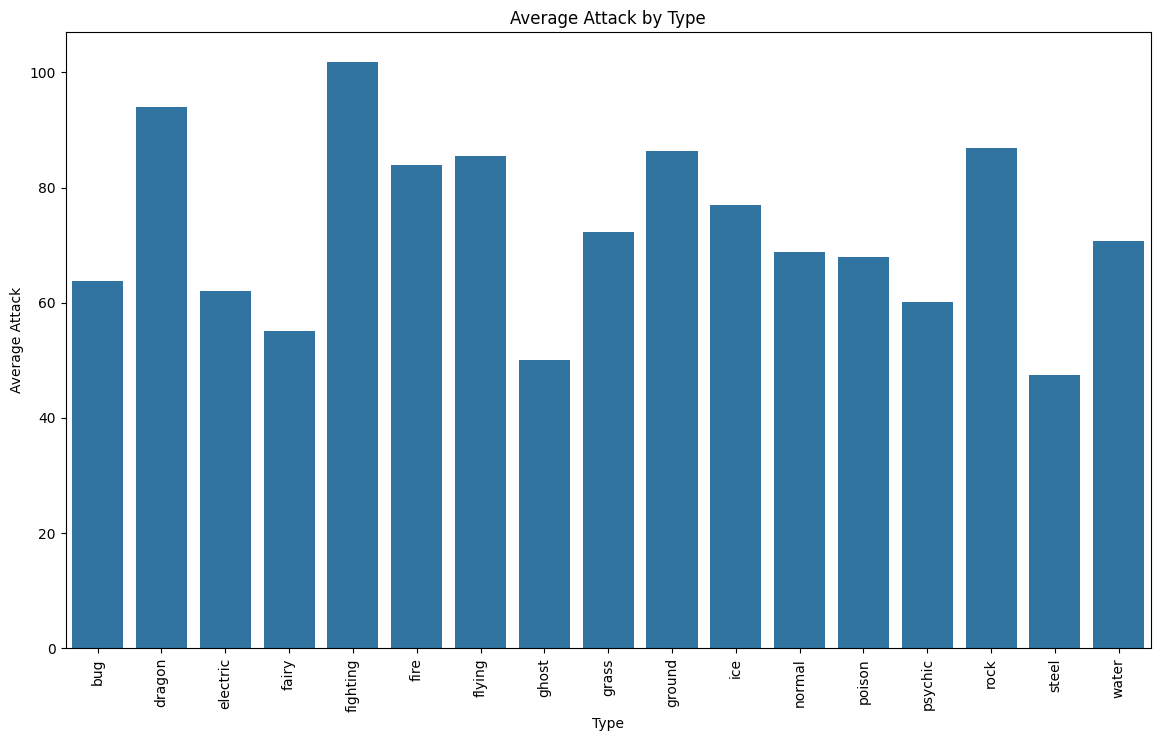

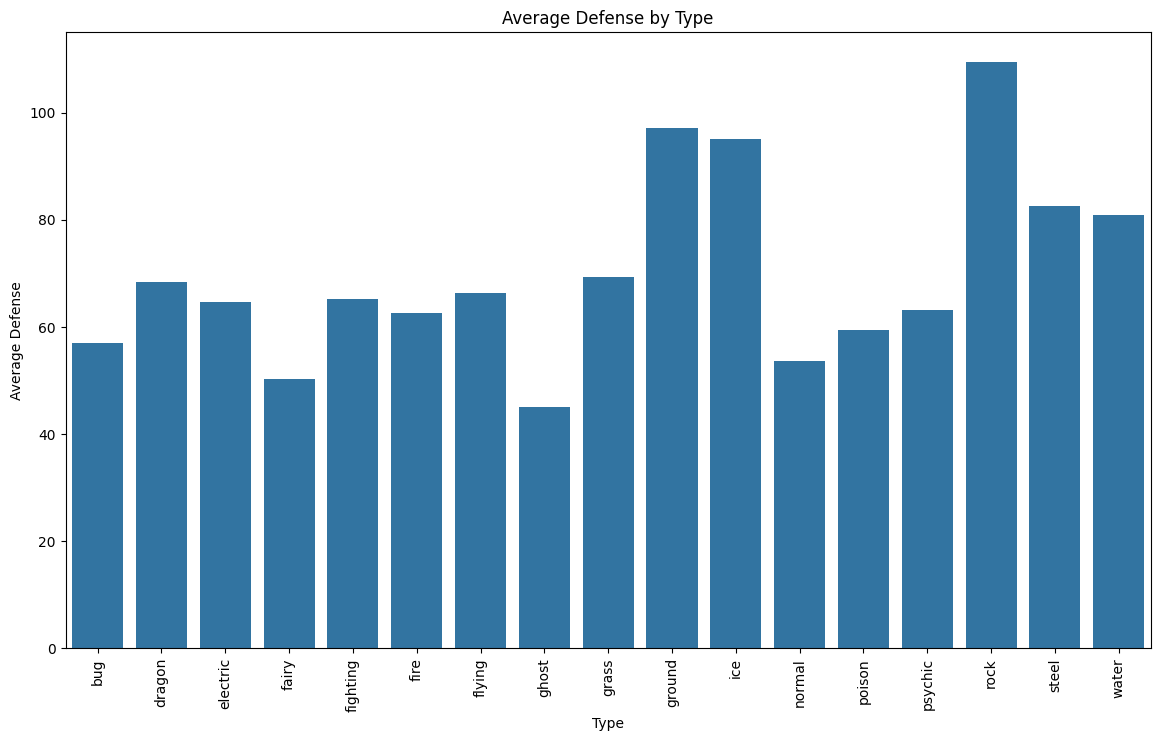

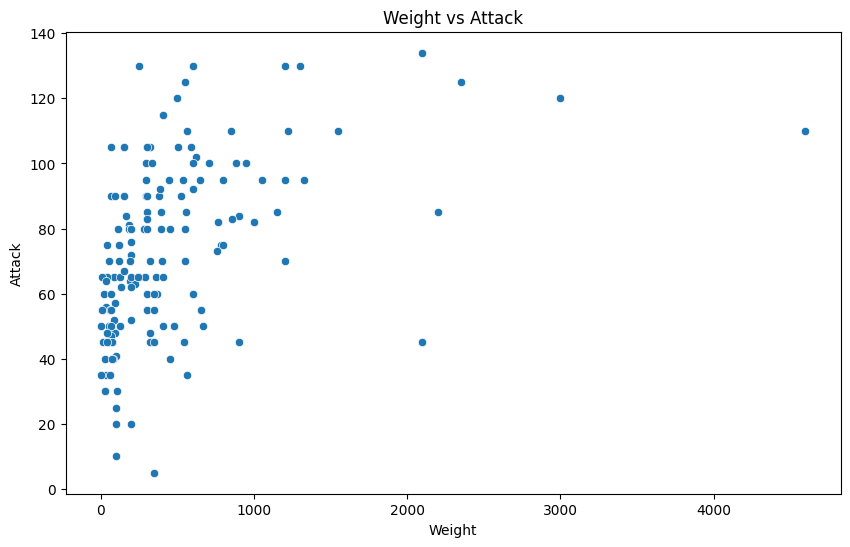

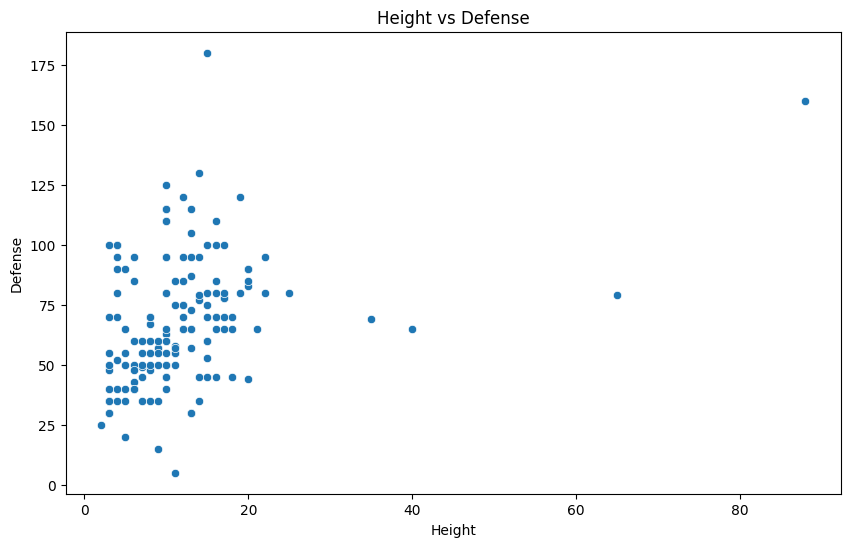

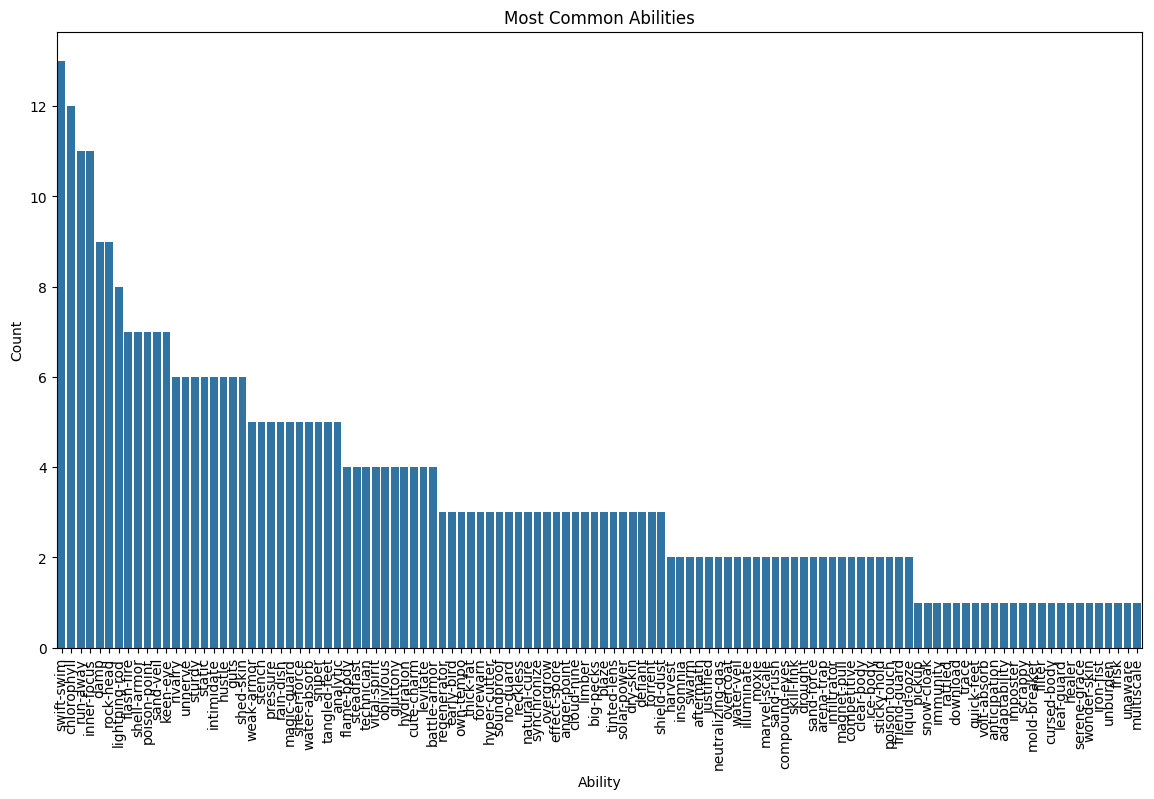

In [15]:
# Distribution of Pokémon base stats
def plot_distribution(column, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column].dropna(), kde=True).set_title(title)
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.show()

plot_distribution('attack', 'Distribution of Attack Stats')
plot_distribution('defense', 'Distribution of Defense Stats')

# Average stats by type
def plot_average_stats_by_type(stat):
    type_stats = df.explode('types').groupby('types')[stat].mean().reset_index()
    plt.figure(figsize=(14, 8))
    sns.barplot(x='types', y=stat, data=type_stats).set_title(f'Average {stat.capitalize()} by Type')
    plt.xticks(rotation=90)
    plt.xlabel('Type')
    plt.ylabel(f'Average {stat.capitalize()}')
    plt.show()

plot_average_stats_by_type('attack')
plot_average_stats_by_type('defense')

# Correlation between Pokémon height/weight and their stats
def plot_correlation(x_column, y_column, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_column, y=y_column, data=df).set_title(title)
    plt.xlabel(x_column.capitalize())
    plt.ylabel(y_column.capitalize())
    plt.show()

plot_correlation('weight', 'attack', 'Weight vs Attack')
plot_correlation('height', 'defense', 'Height vs Defense')

# Most common abilities among Pokémon
def plot_common_abilities():
    abilities_exploded = df.explode('abilities')
    common_abilities = abilities_exploded['abilities'].value_counts().reset_index()
    common_abilities.columns = ['ability', 'count']

    plt.figure(figsize=(14, 8))
    sns.barplot(x='ability', y='count', data=common_abilities).set_title('Most Common Abilities')
    plt.xticks(rotation=90)
    plt.xlabel('Ability')
    plt.ylabel('Count')
    plt.show()

plot_common_abilities()